### Fig. 5 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random as ra
import sys
sys.path.append('/home/caoyuyao/dataset_14T/UID-Moji/src')
from visualization import ProbabilityMatrix
from utils import load_pressure_data
from matplotlib import font_manager 
font_path = "/mnt/cyy14/data_qg/old_draw/font"
font_files = font_manager.findSystemFonts(fontpaths=font_path)
for file in font_files:
    font_manager.fontManager.addfont(file)
plt.rcParams["font.sans-serif"] = "Arial"


'''load ANON data'''
ANON_data_dir = '/mnt/cyy14/random_forest_data/random_forest_data_2019_east_test_0.0001/TC_merged_data/'
X_tc = np.load(ANON_data_dir+'stacked_X_tc.npy')
y_tc = np.load(ANON_data_dir+'stacked_y_tc.npy')
y_tc_pred = np.load(ANON_data_dir+'stacked_y_tc_pred.npy')

ANON_corrected_sphn = X_tc[:, 2]*10 + y_tc_pred
ANON_aws_interp_truth = X_tc[:, 2]*10 + y_tc

'''load UID data'''
data_in_TC = np.load('/mnt/cyy14/Thesis/data/Work2/ANON-UID_compare_in_LEKIMA/stacked_data_in_TC.npy')
UID_corrected_sphn = data_in_TC[:, 3] + data_in_TC[:, -1]
UID_aws_interp_truth = data_in_TC[:, 5]

pm1 = ProbabilityMatrix()
pm1.get_probability_matrix(x = ANON_aws_interp_truth, y = ANON_corrected_sphn, bin_size = 0.1, \
        x_range = [950, 1010], y_range = [950, 1010])

pm2 = ProbabilityMatrix()
pm2.get_probability_matrix(x = UID_aws_interp_truth, y = UID_corrected_sphn, bin_size = 0.1, \
        x_range = [950, 1010], y_range = [950, 1010])

100%|█████████████████████████████████████████████| 1147928/1147928 [00:09<00:00, 119799.66it/s]


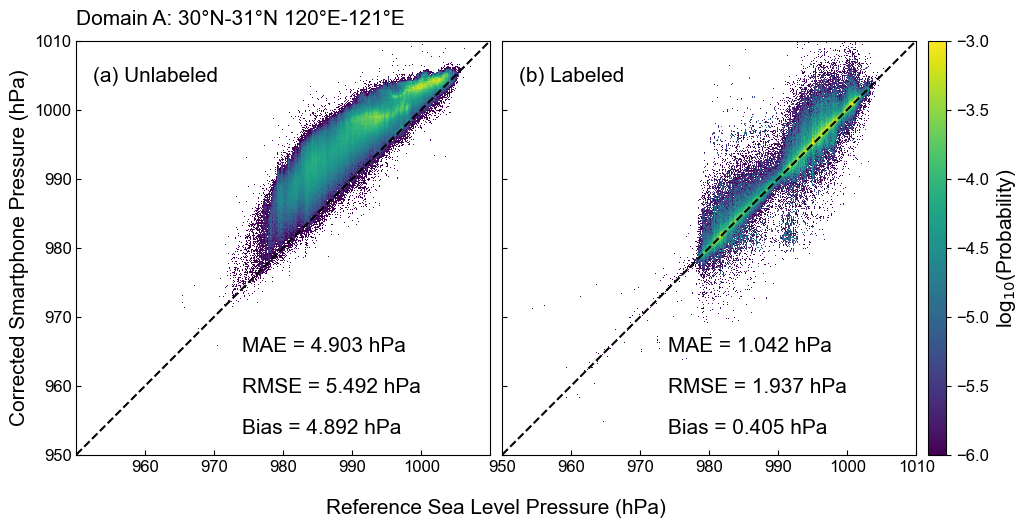

In [ ]:

fig=plt.figure(1)
fig.set_size_inches(12, 12)


mx=0.15
x0=0.345
y0=0.345


'''ANON data'''
ax=plt.axes([mx, 0.5-y0/2, x0, y0])
#ax = fig.add_subplot(gs[0, 0])
ax.set_aspect(1)
plt.sca(ax)

a=pm1.plot_matrix(ylabel = 'Corrected Smartphone Pressure (hPa)',\
                  cbar_label = r'log$_{10}$(Probability)', colorbar=False, xlabel=None, label_size=15)
plt.clim(-6, -3)
plt.xlim(950, 1010)
plt.ylim(950, 1010)
plt.plot([950, 1010], [950, 1010], 'k--')
plt.text(0.04, 0.9, s = '(a) Unlabeled', fontsize=15, transform=ax.transAxes)

plt.yticks(list(range(950,1020,10)), fontsize = 12)
plt.xticks(list(range(960,1010,10)), fontsize = 12)

plt.text(0.4, 0.25, s = 'MAE = {:.3f} hPa'.format(mean_absolute_error(ANON_aws_interp_truth, ANON_corrected_sphn)), fontsize=15, transform=ax.transAxes)
plt.text(0.4, 0.15, s = 'RMSE = {:.3f} hPa'.format(mean_squared_error(ANON_aws_interp_truth, ANON_corrected_sphn, squared = False)), fontsize=15, transform=ax.transAxes)
plt.text(0.4, 0.05, s = 'Bias = {:.3f} hPa'.format(np.nanmean(ANON_corrected_sphn -ANON_aws_interp_truth)), fontsize=15, transform=ax.transAxes)

ax.tick_params(axis = 'both', direction='in')


'''UID data'''
ax=plt.axes([1-mx-x0, 0.5-y0/2, x0, y0])
#ax = fig.add_subplot(gs[0, 1])
ax.set_aspect(1)
plt.sca(ax)
cs=pm2.plot_matrix(ylabel = None, cbar_label = r'log$_{10}$(Probability)', colorbar=False, xlabel=None)
plt.clim(-6, -3)
plt.xlim(950, 1010)
plt.ylim(950, 1010)
plt.plot([950, 1010], [950, 1010], 'k--')
plt.text(0.04, 0.9, s = '(b) Labeled', fontsize=15, transform=ax.transAxes)

plt.yticks(list(range(950,1020,10)),[], fontsize = 12)
plt.xticks(list(range(950,1020,10)), fontsize = 12)

plt.text(0.4, 0.25, s = 'MAE = {:.3f} hPa'.format(mean_absolute_error(UID_aws_interp_truth, UID_corrected_sphn)), fontsize=15, transform=ax.transAxes)
plt.text(0.4, 0.15, s = 'RMSE = {:.3f} hPa'.format(mean_squared_error(UID_aws_interp_truth, UID_corrected_sphn, squared = False)), fontsize=15, transform=ax.transAxes)
plt.text(0.4, 0.05, s = 'Bias = {:.3f} hPa'.format(np.nanmean(UID_corrected_sphn - UID_aws_interp_truth)), fontsize=15, transform=ax.transAxes)

ax.tick_params(axis = 'both', direction='in')

cbar_ax = fig.add_axes([1-mx+0.01, 0.5-y0/2, 0.015, y0])
#cbar_ax = fig.add_axes([0.82, 0.355, 0.015, 0.29])
cl=fig.colorbar(cs, cax=cbar_ax)
#cl_diff.set_ticks(list(range(-3,4)))
cl.ax.tick_params(labelsize=12)
cbar_ax.set_ylabel(r'log$_{10}$(Probability)', fontsize = 15)

fig.text(0.5, 0.5-y0/2-0.045, 'Reference Sea Level Pressure (hPa)', va='center', ha='center', rotation='horizontal', fontsize=15)
fig.text(mx, 0.5+y0/2+0.01, 'Domain A: 30°N-31°N 120°E-121°E', va='bottom', ha='left', rotation='horizontal', fontsize=15)

#fig.text(0.35, 0.32, 'Reference Sea Level Pressure (hPa)', va='center', ha='center', rotation='horizontal', fontsize=15)
#fig.text(0.65, 0.32, 'Reference Sea Level Pressure (hPa)', va='center', ha='center', rotation='horizontal', fontsize=15)

fig_dir = '/mnt/cyy14/data_qg/old_draw/submit/'
# plt.savefig(fig_dir + 'f05.png', dpi = 300, format='png', bbox_inches = 'tight')
